In [30]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd
from cycler import cycler

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12, 9)
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#pd.set_option('display.float_format', lambda x: '%0.3e' % x)
pd.set_option('display.float_format', lambda x: '%0.9f' % x)



In [31]:

try:
    dft = pd.read_csv('test.csv')
except:
    exit(1)
#dft.head()
#print(dft.describe())

<AxesSubplot:>

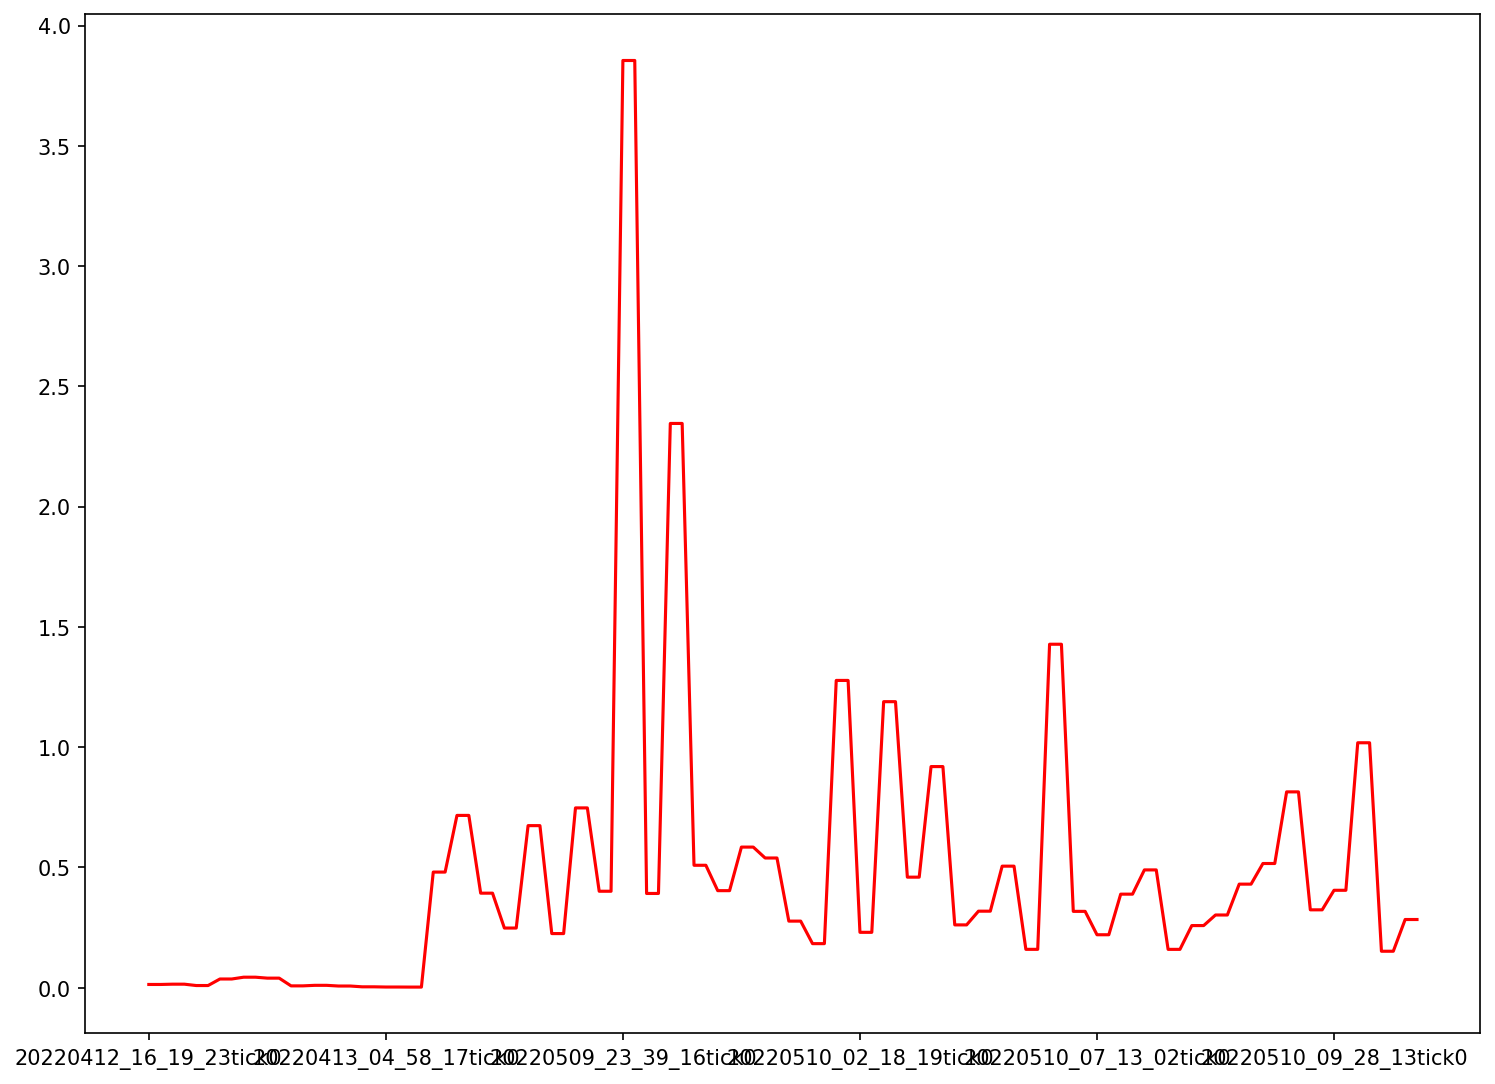

In [32]:
# Pro Tick:
dft_nrg_proTick = dft.T
dft_nrg_proTick = (dft_nrg_proTick ** 2).sum(axis=1)
dft_nrg_proTick.head()


dft_nrg_proTick.plot()


['20220510_07_11_17.wav' '20220510_09_28_22.wav' '20220412_16_19_23.wav'
 '20220509_23_27_52.wav' '20220510_00_13_58.wav']
20220510_07_11_17.wav
20220510_09_28_22.wav
20220412_16_19_23.wav
20220509_23_27_52.wav
20220510_00_13_58.wav


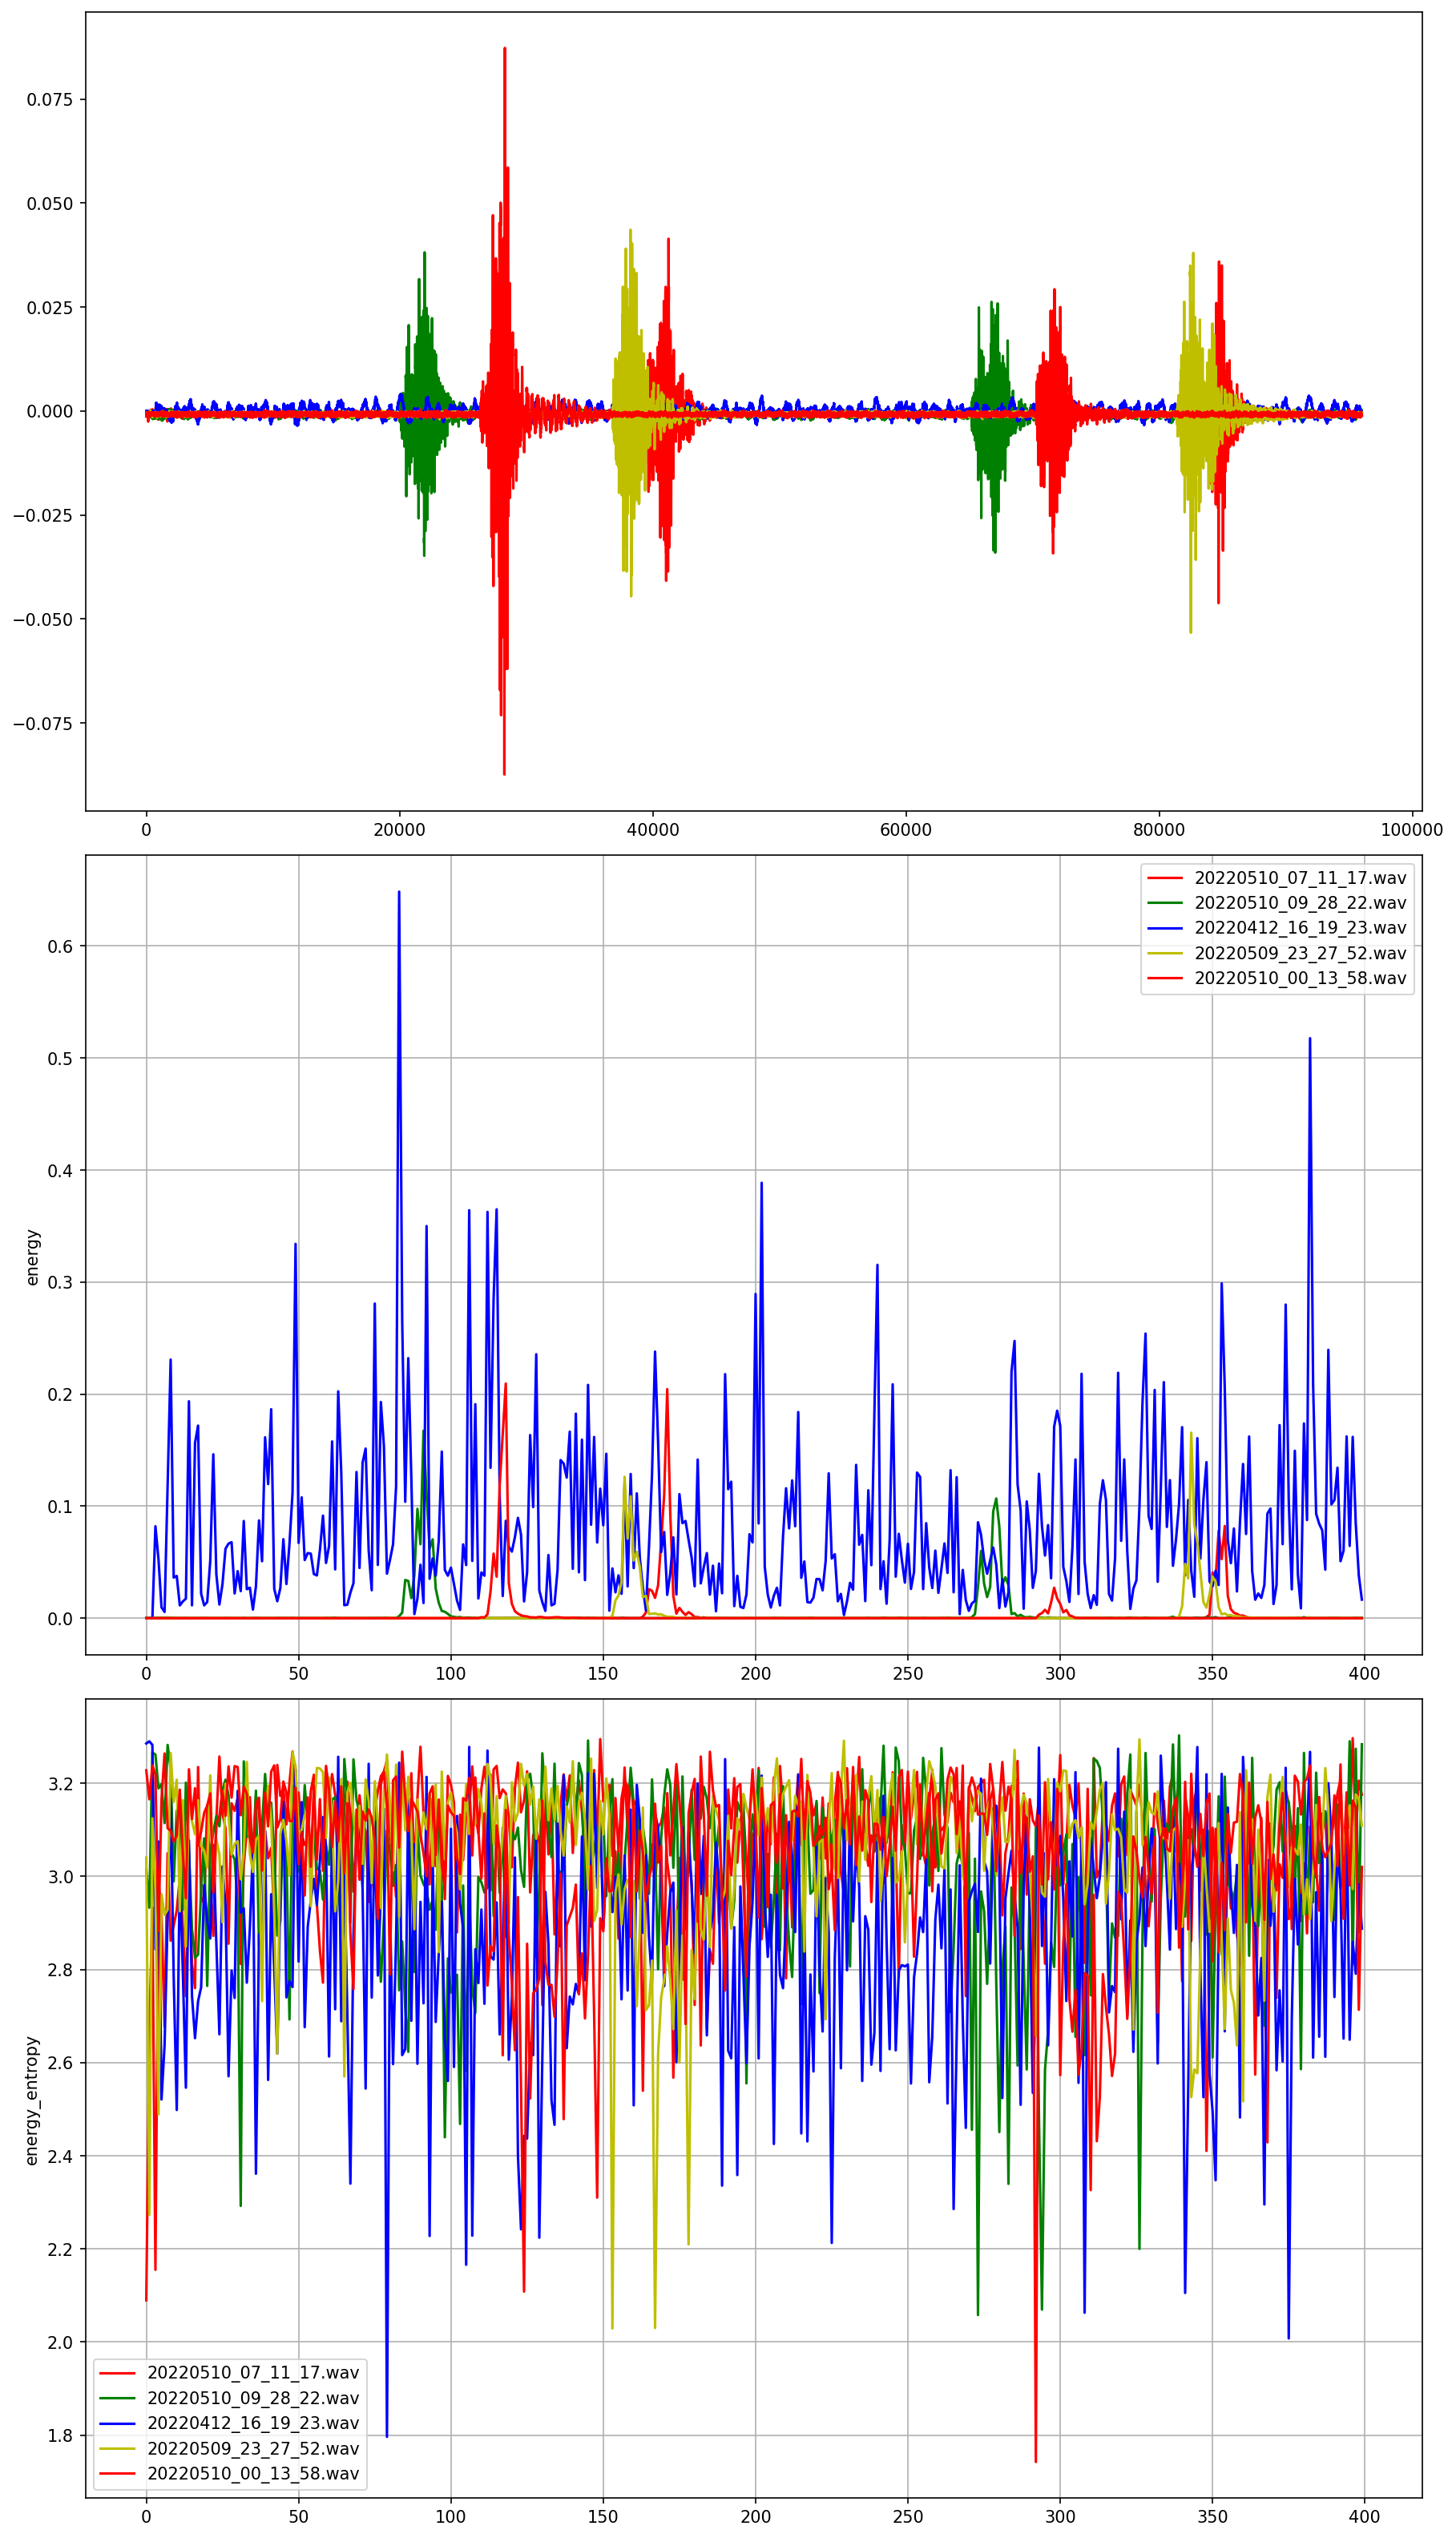

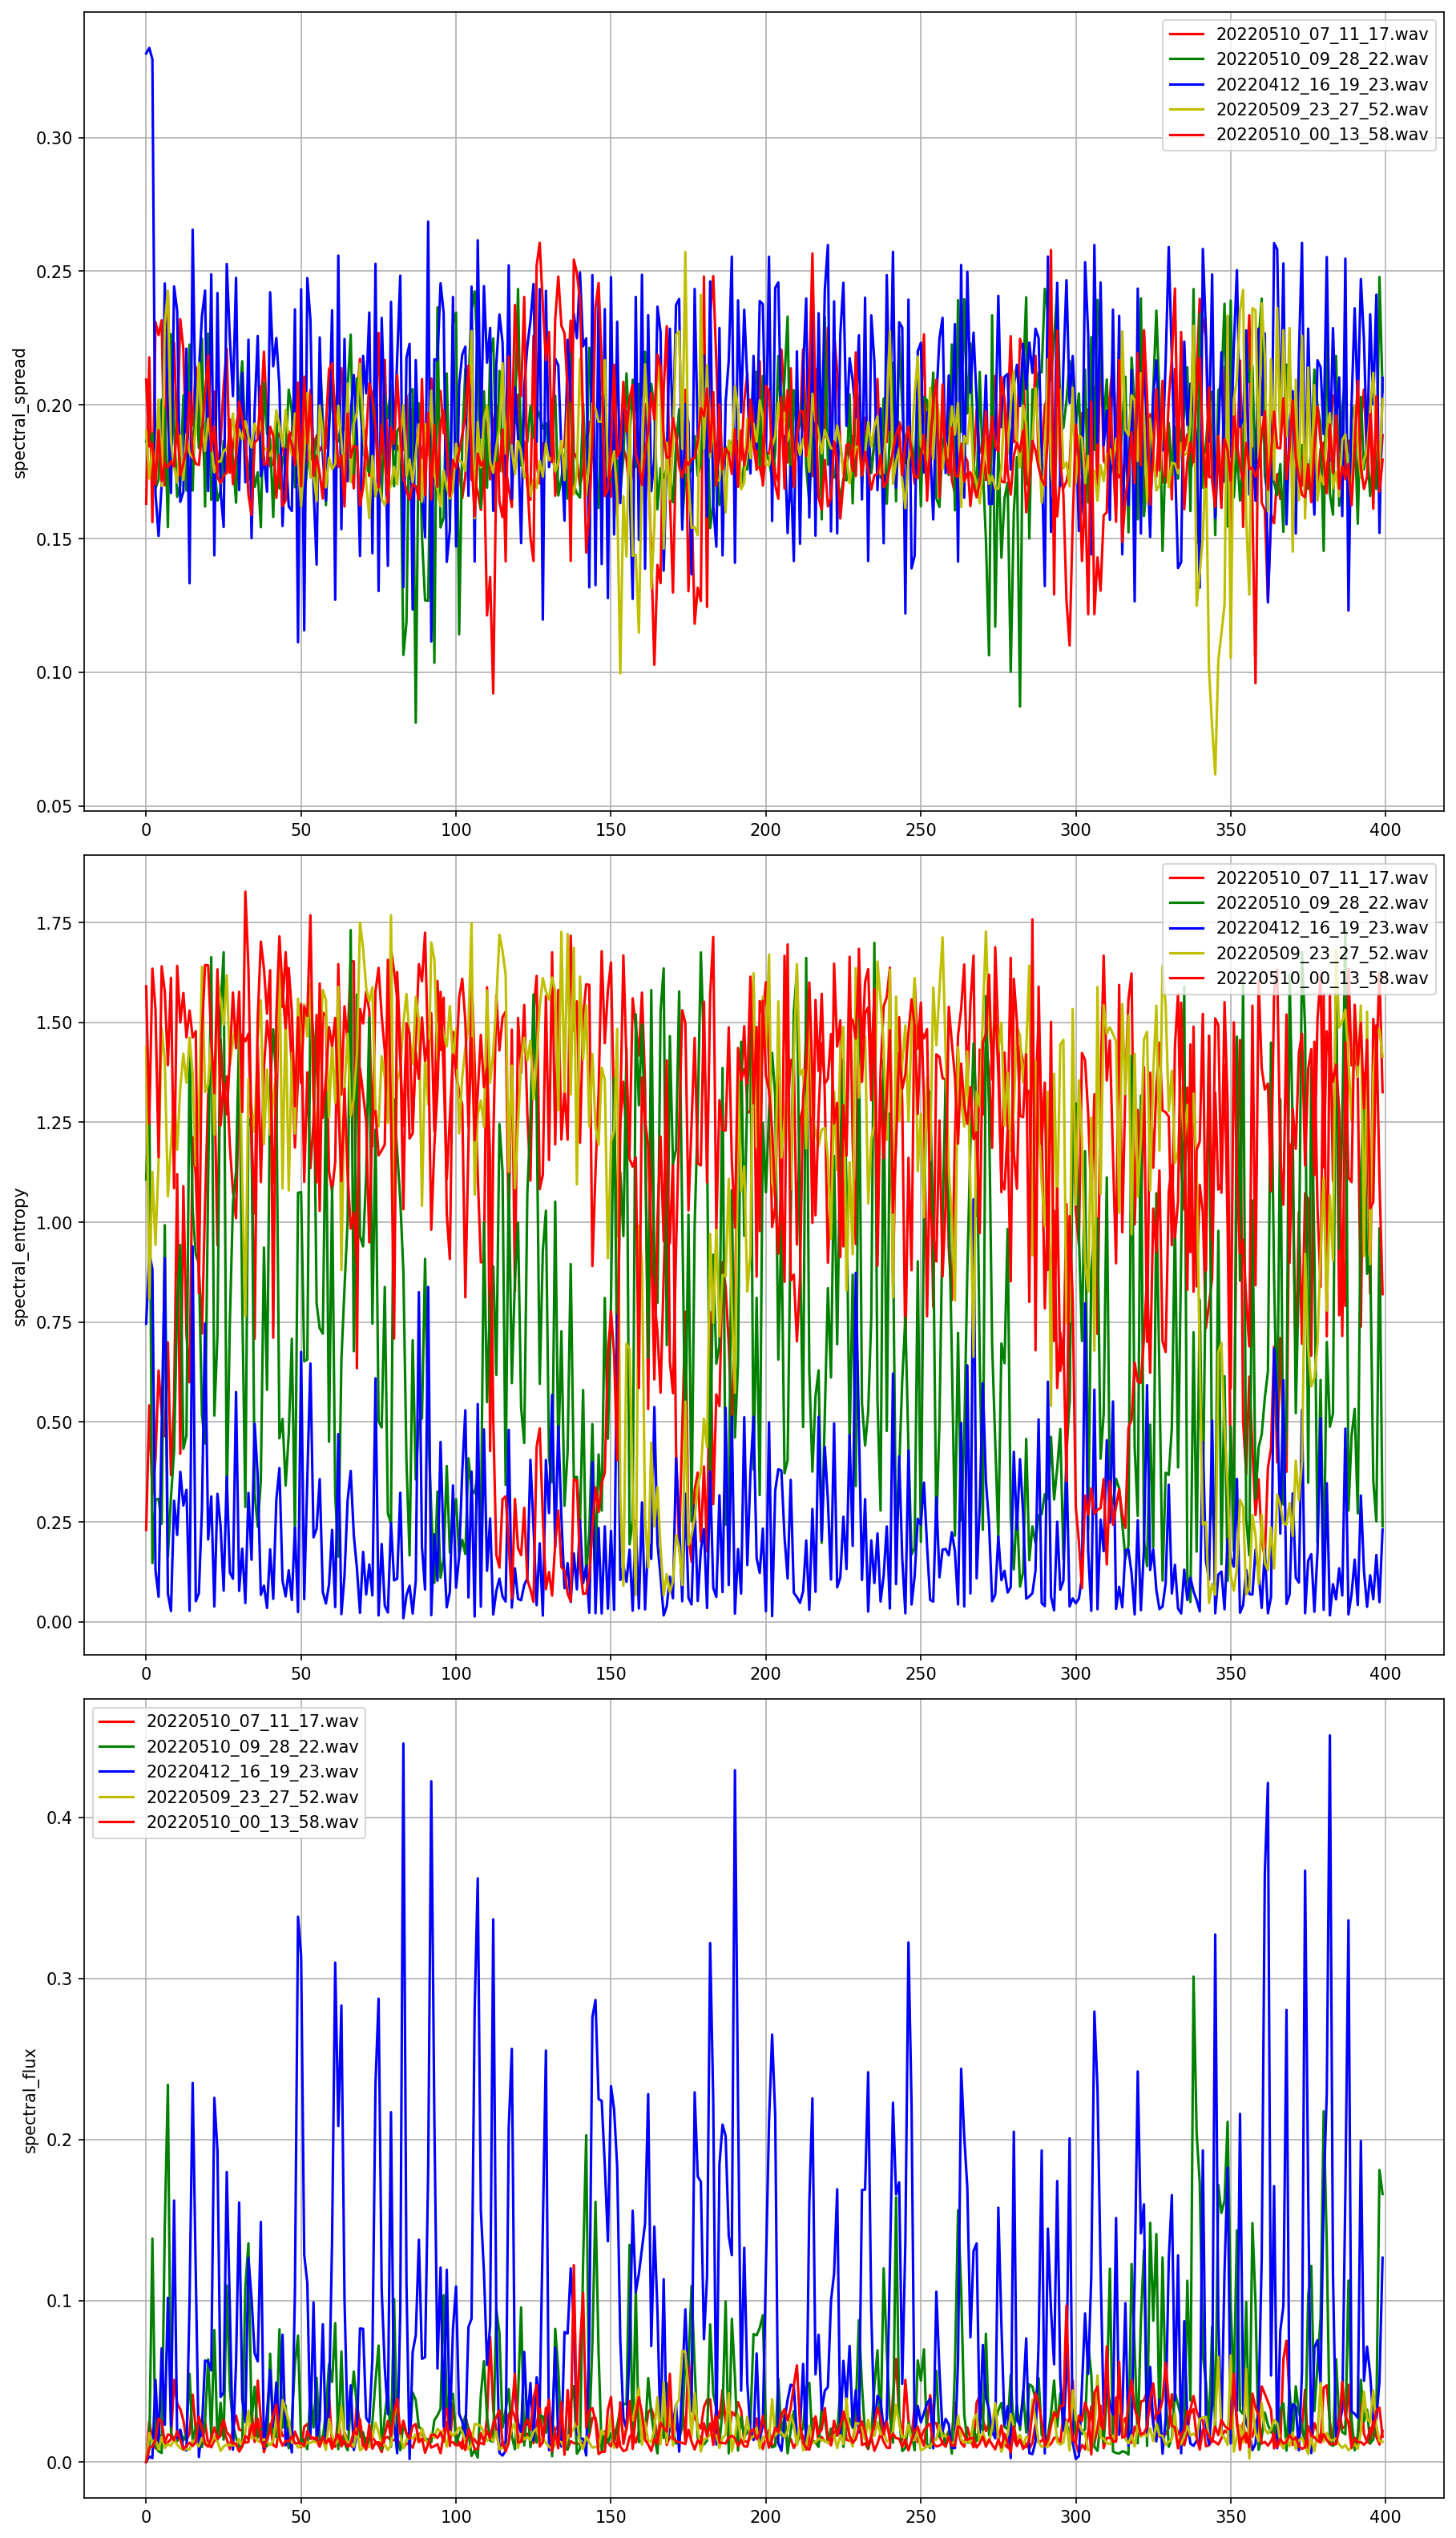

In [33]:
from main import process_folder, chroma_plot, fn_plot
#%matplotlib 
wavfiles=[]
with os.scandir('data') as it:
    for entry in it:
        if entry.name.endswith('.wav') and entry.is_file():
            wavfiles.append(entry.name)

pick = np.random.choice(wavfiles,size=5)
print(pick)
pick.all

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12, 21)
fig, scat = plt.subplots(3, 1, constrained_layout=True)
fig2, scat2 = plt.subplots(3, 1, constrained_layout=True)

for ii in pick:
    x=  1
    print(ii)
    f, fn, fs, signal  = process_folder(ii, 'data')
    scat[0].plot(signal, label=ii)
    while x < 3:
        scat[x].plot(f[x], label=ii)
        scat[x].set_ylabel(fn[x])
        scat[x].legend()
        scat[x].grid(True)
        x += 1
    x = 0
    while x < 3:
        scat2[x].plot(f[x+4], label=ii)
        scat2[x].set_ylabel(fn[x+4])
        scat2[x].legend()
        scat2[x].grid(True)
        x += 1
plt.show(fig)
plt.show(fig2)
